In [1]:
%matplotlib inline
import fft_pd10
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
def test_function(n_iterations, ini, fin, step, test_fn, fft_implementation=None):
    print('Testing ' + str(test_fn))
    if not fft_implementation:
        return np.array(test_fn(n_iterations, ini, fin, step))
    else:
        return np.array(test_fn(n_iterations, ini, fin, step, fft_func=fft_implementation))


def fit_times(ini, fin, step, data, expression):
    x = np.array([i for i in range(ini, fin + 1, step)])
    x = x.reshape(-1, 1)

    lr_m = LinearRegression()
    lr_m.fit(expression(x), data)
    return lr_m.predict(expression(x)), x

In [5]:
ITERS = 10
INI = 10
FIN = 1000
STEP = 5

times_fft = test_function(ITERS, INI, FIN, STEP, fft_pd10.time_fft, fft_pd10.fft)
predicted_fft, x = fit_times(INI, FIN, STEP, times_fft, lambda x: (2**np.ceil(np.log2(x)))*np.log2(2**np.ceil(np.log2(x))))


Testing <function time_fft at 0x7fb3d2a929d0>
Testing <function time_fft at 0x7fb3d2a929d0>


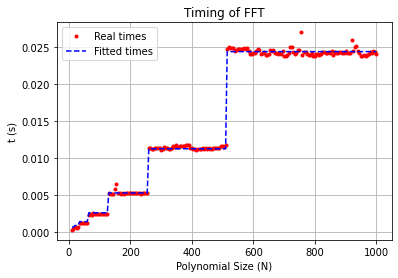

In [9]:
plt.title("Timing of FFT")
plt.xlabel("Polynomial Size (N)")
plt.ylabel("t (s)")
plt.grid(True)
plt.plot(x, times_fft, '.r', x, predicted_fft, '--b')
plt.legend(['Real times', 'Fitted times'])
plt.savefig('graph1.png', transparent=False)

In [19]:
times_fft_np = test_function(3, 4000, 20000, 300, fft_pd10.time_mult_numbers_fft, np.fft.fft)
predicted_fft_np_th, x_np = fit_times(4000, 20000, 300, times_fft_np, lambda x: (x*np.log2(x)*np.log2(np.log2(x))))
predicted_fft_np_re, _ = fit_times(4000, 20000, 300, times_fft_np, lambda x: (x**np.log2(6)*np.log2(x)*np.log2(np.log2(x))))

Testing <function time_mult_numbers_fft at 0x7fb3d2a92af0>


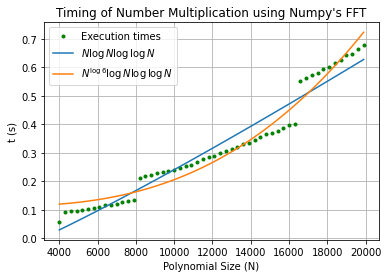

In [20]:
plt.title("Timing of Number Multiplication using Numpy's FFT")
plt.xlabel("Polynomial Size (N)")
plt.ylabel("t (s)")
plt.grid(True)
plt.plot(x_np, times_fft_np, '.g', x_np, predicted_fft_np_th, x_np, predicted_fft_np_re)
plt.legend(['Execution times', '$N\log N \log \log N$', '$N^{\log 6} \log N \log \log N$'])
plt.savefig('graph2.png', transparent=False)

In [26]:
n_pairs = 10
execution_times_mul = np.array(fft_pd10.time_mult_polynomials_fft(n_pairs, INI, FIN, STEP))

x = np.array([i for i in range(INI,FIN+1,STEP)])
x = x.reshape(-1, 1)

lr_m_mul = LinearRegression()
lr_m_mul.fit((2**np.ceil(np.log2(x)))*np.log2(2**np.ceil(np.log2(x))), execution_times_mul)

predicted_times_mul = lr_m_mul.predict((2**np.ceil(np.log2(x)))*np.log2(2**np.ceil(np.log2(x))))

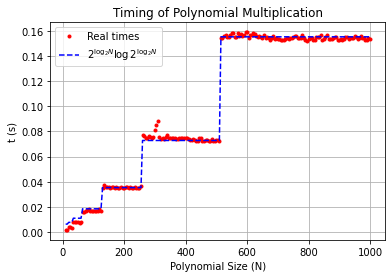

In [27]:
plt.title("Timing of Polynomial Multiplication")
plt.xlabel("Polynomial Size (N)")
plt.ylabel("t (s)")
plt.grid(True)
plt.plot(x, execution_times_mul, '.r', x, predicted_times_mul, '--b')
plt.legend(['Real times', '$2^{\log_2 N} \log 2^{\log_2 N}$'])
plt.savefig('graph3.png', transparent=False)

In [21]:
times_num = test_function(ITERS, INI, 800, STEP, fft_pd10.time_mult_numbers_fft)
predicted_num_1, x_num = fit_times(INI, 800, STEP, times_num, lambda x: (2**np.ceil(np.log2(x)))*np.log2(2**np.ceil(np.log2(x))))
predicted_num_2, _ = fit_times(INI, 800, STEP, times_num, lambda x: x**np.log2(6))

Testing <function time_mult_numbers_fft at 0x7fb3d2a92af0>


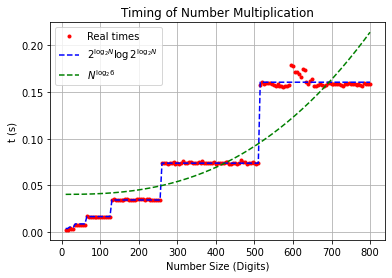

In [25]:
plt.title("Timing of Number Multiplication")
plt.xlabel("Number Size (Digits)")
plt.ylabel("t (s)")
plt.grid(True)
plt.plot(x_num, times_num, '.r', x_num, predicted_num_1, '--b', x_num, predicted_num_2[0], '--g')
plt.legend(['Real times', '$2^{ \log_{2}N} \log 2^{ \log_{2}N}$', '$N^{\log_2 6}$'])
plt.savefig('graph4.png', transparent=False)